In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
from src.resi_credit.data_sources.fannie import get_data
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
# FN = get_data.FannieMae(client_id=os.getenv("FN_CLIENT_ID"), client_secret=os.getenv("FN_CLIENT_SECRET"))
# FN.get_crt(historical=False)

In [4]:
import polars as pl

reader = pl.read_csv_batched("raw_data/fannie/CAS_Apr25.csv", has_header=False, separator="|")
reader

In [ ]:
# The error suggests there is a malformed line in the CSV file.
# To skip problematic lines, use the 'error_bad_lines' or 'on_bad_lines' parameter.

# For pandas >= 1.3.0, use 'on_bad_lines':
# Read only the first chunk (1,000,000 rows) and skip malformed lines


column_names = [
    "Reference Pool ID",
    "Loan Identifier",
    "Monthly Reporting Period",
    "Channel",
    "Seller Name",
    "Servicer Name",
    "Master Servicer",
    "Original Interest Rate",
    "Current Interest Rate",
    "Original UPB",
    "UPB at Issuance",
    "Current Actual UPB",
    "Original Loan Term",
    "Origination Date",
    "First Payment Date",
    "Loan Age",
    "Remaining Months to Legal Maturity",
    "Remaining Months To Maturity",
    "Maturity Date",
    "Original Loan to Value Ratio (LTV)",
    "Original Combined Loan to Value Ratio (CLTV)",
    "Number of Borrowers",
    "Debt-To-Income (DTI)",
    "Borrower Credit Score at Origination",
    "Co-Borrower Credit Score at Origination",
    "First Time Home Buyer Indicator",
    "Loan Purpose",
    "Property Type",
    "Number of Units",
    "Occupancy Status",
    "Property State",
    "Metropolitan Statistical Area (MSA)",
    "Zip Code Short",
    "Mortgage Insurance Percentage",
    "Amortization Type",
    "Prepayment Penalty Indicator",
    "Interest Only Loan Indicator",
    "Interest Only First Principal And Interest Payment Date",
    "Months to Amortization",
    "Current Loan Delinquency Status",
    "Loan Payment History",
    "Modification Flag",
    "Mortgage Insurance Cancellation Indicator",
    "Zero Balance Code",
    "Zero Balance Effective Date",
    "UPB at the Time of Removal",
    "Repurchase Date",
    "Scheduled Principal Current",
    "Total Principal Current",
    "Unscheduled Principal Current",
    "Last Paid Installment Date",
    "Foreclosure Date",
    "Disposition Date",
    "Foreclosure Costs",
    "Property Preservation and Repair Costs",
    "Asset Recovery Costs",
    "Miscellaneous Holding Expenses and Credits",
    "Associated Taxes for Holding Property",
    "Net Sales Proceeds",
    "Credit Enhancement Proceeds",
    "Repurchase Make Whole Proceeds",
    "Other Foreclosure Proceeds",
    "Modification-Related Non-Interest Bearing UPB",
    "Principal Forgiveness Amount",
    "Original List Start Date",
    "Original List Price",
    "Current List Start Date",
    "Current List Price",
    "Borrower Credit Score At Issuance",
    "Co-Borrower Credit Score At Issuance",
    "Borrower Credit Score Current",
    "Co-Borrower Credit Score Current",
    "Mortgage Insurance Type",
    "Servicing Activity Indicator",
    "Current Period Modification Loss Amount",
    "Cumulative Modification Loss Amount",
    "Current Period Credit Event Net Gain or Loss",
    "Cumulative Credit Event Net Gain or Loss",
    "Special Eligibility Program",
    "Foreclosure Principal Write-off Amount",
    "Relocation Mortgage Indicator",
    "Zero Balance Code Change Date",
    "Loan Holdback Indicator",
    "Loan Holdback Effective Date",
    "Delinquent Accrued Interest",
    "Property Valuation Method",
    "High Balance Loan Indicator",
    "ARM Initial Fixed-Rate Period ≤ 5 YR Indicator",
    "ARM Product Type",
    "Initial Fixed-Rate Period",
    "Interest Rate Adjustment Frequency",
    "Next Interest Rate Adjustment Date",
    "Next Payment Change Date",
    "Index",
    "ARM Cap Structure",
    "Initial Interest Rate Cap Up Percent",
    "Periodic Interest Rate Cap Up Percent",
    "Lifetime Interest Rate Cap Up Percent",
    "Mortgage Margin",
    "ARM Balloon Indicator",
    "ARM Plan Number",
    "Borrower Assistance Plan",
    "High Loan to Value (HLTV) Refinance Option Indicator",
    "Deal Name",
    "Repurchase Make Whole Proceeds Flag",
    "Alternative Delinquency Resolution",
    "Alternative Delinquency Resolution Count",
    "Total Deferral Amount",
    "Payment Deferral Modification Event Indicator",
    "Interest Bearing UPB"
]

df_chunk = pd.read_csv("raw_data/fannie/CAS_Apr25.csv", chunksize=1000000, on_bad_lines='skip', delimiter="|", header=None)

first_chunk = next(df_chunk)
first_chunk.columns = column_names
print(len(first_chunk.index))
first_chunk.head(100)

In [ ]:
first_chunk.head(100).to_csv("tester.csv", index=False)

In [ ]:
"""
Potential features for use in credit risk modelling:
"""

prop_valuation_method = "Property Valuation Method"
special_eligibility_program = "Special Eligibility Program"
mortgage_insurance_type = "Mortgage Insurance Type"
credit_score_at_issuance = "Borrower Credit Score At Issuance"
credit_score_at_origination = "Borrower Credit Score at Origination"
credit_score_current = "Borrower Credit Score Current"
mortgage_insurance_percentage = "Mortgage Insurance Percentage"
msa = "Metropolitan Statistical Area (MSA)"
state = "Property State"
number_of_units = "Number of Units"
occupancy_status = "Occupancy Status"
property_type = "Property Type"
loan_purpose = "Loan Purpose"
first_time_home_buyer = "First Time Home Buyer Indicator"
dti = "Debt-To-Income (DTI)"
cltv = "Original Combined Loan to Value Ratio (CLTV)"
oltv = "Original Loan to Value Ratio (LTV)"
months_to_maturity = "Remaining Months To Maturity"
loan_age = "Loan Age"
original_loan_term = "Original Loan Term"
original_interest_rate = "Original Interest Rate"
current_interest_rate = "Current Interest Rate"
servicer = "Servicer Name"
seller = "Seller Name"
channel = "Channel"
orig_balance = "Original UPB"

"""
Loss columns
"""

delinq_interest_accrued = "Delinquent Accrued Interest"
foreclosure_principal_write_off = "Foreclosure Principal Write-off Amount"
cum_credit_event_net_gain_or_loss = "Cumulative Credit Event Net Gain or Loss"
cum_modification_loss_amount = "Cumulative Modification Loss Amount"
foreclosure_costs = "Foreclosure Costs"
foreclosure_date = "Foreclosure Date"
modified_flag = "Modification Flag"
current_delinquency_status = "Current Loan Delinquency Status"
loan_payment_history = "Loan Payment History"

"""
Other
"""

zero_balance_code = "Zero Balance Code" # shows why a balance went to zero\

In [ ]:
first_chunk["High Loan to Value (HLTV) Refinance Option Indicator"].unique()

array(['N'], dtype=object)

In [ ]:
loss_rate = first_chunk[cum_credit_event_net_gain_or_loss].sum() / first_chunk[orig_balance].sum()
loss_rate = round(loss_rate * 100, 2)

/tmp/ipykernel_12585/1617927571.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_fico = first_chunk.groupby(['fico_band']).apply(
/tmp/ipykernel_12585/1617927571.py:12: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: round(x[cum_credit_event_net_gain_or_loss].sum() / x[orig_balance].sum() * 100, 2)
/tmp/ipykernel_12585/1617927571.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_fico = first_chunk.groupby(['fico_band']).apply(


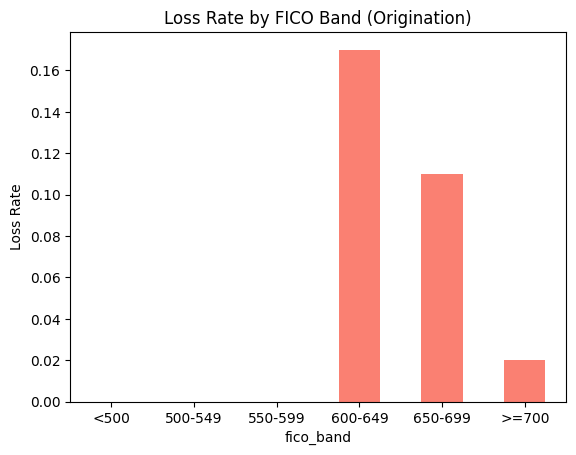

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create FICO band column
# Create FICO band column with bins: <500, 500-549, 550-599, 600-649, 650-699, >=700
fico_bins = [float('-inf'), 500, 550, 600, 650, 700, float('inf')]
fico_labels = ['<500', '500-549', '550-599', '600-649', '650-699', '>=700']
first_chunk['fico_band'] = pd.cut(first_chunk[credit_score_at_origination], bins=fico_bins, labels=fico_labels)

# Calculate loss rate by FICO band
loss_by_fico = first_chunk.groupby(['fico_band']).apply(
    lambda x: round(x[cum_credit_event_net_gain_or_loss].sum() / x[orig_balance].sum() * 100, 2)
)

# Plot
loss_by_fico.plot(kind='bar', color=['salmon'])
plt.ylabel('Loss Rate')
plt.title('Loss Rate by FICO Band (Origination)')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_12585/562074605.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_purpose = first_chunk.groupby([loan_purpose]).apply(


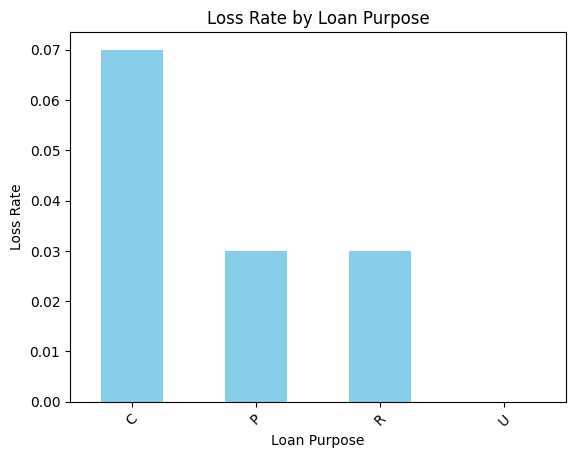

In [ ]:
# Calculate loss rate by Loan Purpose
loss_by_purpose = first_chunk.groupby([loan_purpose]).apply(
    lambda x: round(x[cum_credit_event_net_gain_or_loss].sum() / x[orig_balance].sum() * 100, 2)
)

# Plot
loss_by_purpose.plot(kind='bar', color='skyblue')
plt.ylabel('Loss Rate')
plt.title('Loss Rate by Loan Purpose')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_12585/959994384.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_interest_rate = first_chunk.groupby('interest_rate_band').apply(
/tmp/ipykernel_12585/959994384.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_interest_rate = first_chunk.groupby('interest_rate_band').apply(


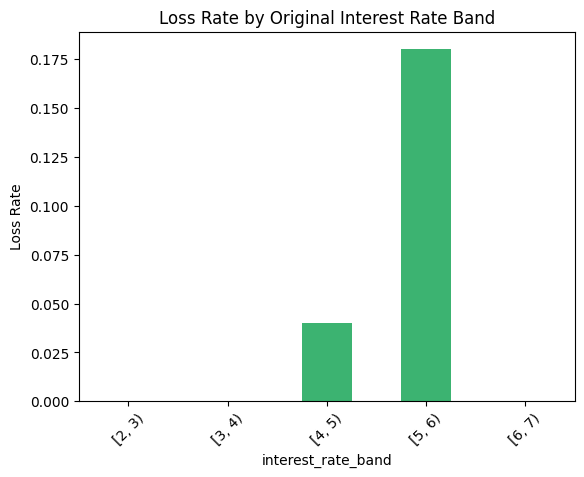

In [ ]:
# Create interest rate bands (1% increments)
interest_rate_bins = range(int(first_chunk[original_interest_rate].min()), int(first_chunk[original_interest_rate].max()) + 2)
first_chunk['interest_rate_band'] = pd.cut(first_chunk[original_interest_rate], bins=interest_rate_bins, right=False)

# Calculate loss rate by interest rate band
loss_by_interest_rate = first_chunk.groupby('interest_rate_band').apply(
    lambda x: round(x[cum_credit_event_net_gain_or_loss].sum() / x[orig_balance].sum() * 100, 2)
)

# Plot
loss_by_interest_rate.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Loss Rate')
plt.title('Loss Rate by Original Interest Rate Band')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_12585/3562902807.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  loss_by_deal = first_chunk.groupby("Deal Name").apply(


Deal Name
CAS 2015 C02 G1    0.0876
CAS 2015 C03 G1    0.0880
CAS 2015 C04 G1    0.0243
CAS 2016 C01 G1    0.0233
CAS 2016 C01 G2    0.0290
CAS 2016 C02 G1    0.0119
CAS 2016 C03 G1    0.0105
CAS 2016 C03 G2    0.0086
CAS 2016 C04 G1    0.0165
dtype: float64

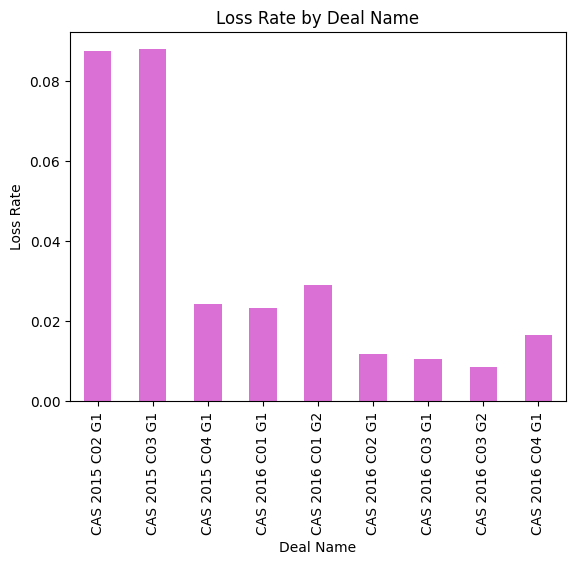

In [ ]:
# Calculate loss rate by Deal Name
loss_by_deal = first_chunk.groupby("Deal Name").apply(
    lambda x: round(x[cum_credit_event_net_gain_or_loss].sum() / x[orig_balance].sum() * 100, 4)
)

display(loss_by_deal)

# Plot
loss_by_deal.plot(kind='bar', color='orchid')
plt.ylabel('Loss Rate')
plt.title('Loss Rate by Deal Name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
first_chunk["Deal Name"].unique()

array(['CAS 2015 C02 G1', 'CAS 2015 C03 G1', 'CAS 2015 C04 G1',
       'CAS 2016 C01 G1', 'CAS 2016 C01 G2', 'CAS 2016 C02 G1',
       'CAS 2016 C03 G2', 'CAS 2016 C03 G1', 'CAS 2016 C04 G1'],
      dtype=object)

In [ ]:
first_chunk[current_delinquency_status].unique()

array([nan,  0.,  1.,  4.,  5.,  2.,  3.,  6.,  7.,  9., 34., 16., 12.,
       10., 75., 15., 13., 29.,  8., 28., 19., 39., 37., 11., 14., 18.,
       20., 21., 45., 38., 26., 81., 70., 50., 17., 40., 69., 32., 22.,
       24., 54., 59., 52., 36., 31., 23., 53., 27., 65., 47., 44., 55.,
       25., 74., 49., 58., 62., 66., 30., 43., 77., 42.])

In [ ]:
# Create a new column 'delinq_status' based on 'current_delinquency_status'
def map_delinq_status(x):
    try:
        val = float(x)
    except (ValueError, TypeError):
        return 'Other'
    if val >= 30 and val < 60:
        return '30d'
    elif val >= 60:
        return '60+'
    elif val >= 90:
        return "90+"
    else:
        return 'Current'

first_chunk['delinq_status'] = first_chunk[current_delinquency_status].apply(map_delinq_status)
first_chunk['delinq_status'].value_counts()

delinq_status
Current    999950
30d            41
60+             9
Name: count, dtype: int64

,delinq_status,30d,60+,Current
Deal Name,Deal Name,,,
CAS 2015 C02 G1,CAS 2015 C02 G1,0.000000,0.000000,100.000000
CAS 2015 C03 G1,CAS 2015 C03 G1,0.000000,0.000000,100.000000
CAS 2015 C04 G1,CAS 2015 C04 G1,0.004938,0.002469,99.992592
CAS 2016 C01 G1,CAS 2016 C01 G1,0.004962,0.001241,99.993797
CAS 2016 C01 G2,CAS 2016 C01 G2,0.004176,0.000000,99.995824
CAS 2016 C02 G1,CAS 2016 C02 G1,0.005472,0.000684,99.993844
CAS 2016 C03 G1,CAS 2016 C03 G1,0.006038,0.000000,99.993962
CAS 2016 C03 G2,CAS 2016 C03 G2,0.006352,0.002722,99.990926
CAS 2016 C04 G1,CAS 2016 C04 G1,0.006222,0.000566,99.993213


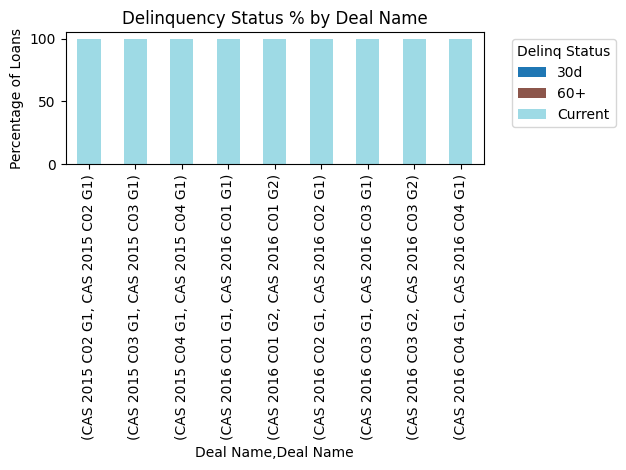

In [ ]:
# Calculate % of each delinq_status by Deal Name
delinq_pct_by_deal = (
    first_chunk.groupby(["Deal Name", "delinq_status"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum() * 100)
    .unstack(fill_value=0)
)

display(delinq_pct_by_deal)

# Plot
delinq_pct_by_deal.plot(kind='bar', stacked=True, colormap='tab20')
plt.ylabel('Percentage of Loans')
plt.title('Delinquency Status % by Deal Name')
plt.xticks(rotation=90)
plt.legend(title='Delinq Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
first_chunk[loan_payment_history].unique()

array([nan, '000000000000000000000000000000000000000000000000',
       '000000000000000000000001000000000000010100000100', ...,
       '000000000000010100000000000100000001000001010101',
       '000000000000010000000000000000000100000000010001',
       '000101000101010102020100010102010101010000000000'],
      shape=(7002,), dtype=object)

In [ ]:
first_chunk[first_chunk[current_delinquency_status] > 0.]

,Reference Pool ID,Loan Identifier,Monthly Reporting Period,Channel,Seller Name,Servicer Name,Master Servicer,Original Interest Rate,Current Interest Rate,Original UPB,...,ARM Plan Number,Borrower Assistance Plan,High Loan to Value (HLTV) Refinance Option Indicator,Deal Name,Repurchase Make Whole Proceeds Flag,Alternative Delinquency Resolution,Alternative Delinquency Resolution Count,Total Deferral Amount,Payment Deferral Modification Event Indicator,Interest Bearing UPB
347,1399,27475177,22025,R,"JPMorgan Chase Bank, National Association","JPMorgan Chase Bank, NA",FANNIE MAE,5.375,5.375,211000.0,...,NaN,N,N,CAS 2015 C02 G1,NaN,7,NaN,NaN,7.0,NaN
866,1399,27475696,22025,R,"Prospect Mortgage, LLC",New Residential Mortgage LLC,FANNIE MAE,4.250,4.250,276000.0,...,NaN,N,N,CAS 2015 C02 G1,NaN,C,1.0,15201.23,7.0,NaN
1698,1399,27476528,22025,C,"Wells Fargo Bank, N.A.",Nationstar Mortgage LLC,FANNIE MAE,4.875,4.875,42000.0,...,NaN,N,N,CAS 2015 C02 G1,NaN,7,NaN,NaN,7.0,NaN
1740,1399,27476570,22025,C,"Wells Fargo Bank, N.A.",Nationstar Mortgage LLC,FANNIE MAE,4.750,4.750,46000.0,...,NaN,N,N,CAS 2015 C02 G1,NaN,7,NaN,NaN,7.0,NaN
1757,1399,27476587,22025,C,"Wells Fargo Bank, N.A.",Nationstar Mortgage LLC,FANNIE MAE,5.250,5.250,67000.0,...,NaN,N,N,CAS 2015 C02 G1,NaN,P,1.0,1503.34,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998532,1449,34630185,22025,R,Other,Other,FANNIE MAE,4.125,4.125,159000.0,...,NaN,N,N,CAS 2016 C04 G1,NaN,7,NaN,NaN,7.0,128010.24
998932,1449,34630591,22025,B,Other,Freedom Mortgage Corp.,FANNIE MAE,4.250,4.250,170000.0,...,NaN,N,N,CAS 2016 C04 G1,NaN,7,NaN,NaN,7.0,171974.05
999327,1449,34630988,22025,R,Other,Other,FANNIE MAE,5.125,5.125,48000.0,...,NaN,N,N,CAS 2016 C04 G1,NaN,7,NaN,NaN,7.0,39770.41
999391,1449,34631052,22025,R,Other,Freedom Mortgage Corp.,FANNIE MAE,4.250,4.250,202000.0,...,NaN,N,N,CAS 2016 C04 G1,NaN,7,NaN,NaN,7.0,164259.02
